In [1]:
# Подключение основных библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [12]:
data = pd.read_csv('penguins.csv')

Признаки:

1. **species** - вид (нужно предсказать)

2. island - остров

3. bill_length_mm  - длина клюва

4. bill_depth_mm - ширина клюва

5. flipper_length_mm- длина ласт

6. body_mass_g - масса

7. sex - пол

In [13]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [15]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# Пропуски, дубликаты

In [16]:
data.describe(include = 'O')

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


In [17]:
# Пропуски
data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [18]:
# Дубликаты
data.duplicated().sum()

0

In [19]:
data[data['bill_length_mm'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [20]:
data = data.dropna(subset=["bill_length_mm"])

In [21]:
# Пропуски пола заполним женскими особями, т.к. их меньше
data['sex'] = data['sex'].fillna('female')

In [22]:
data.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [23]:
# Обновим индексы
data = data.reset_index(drop=True)

In [73]:
data.shape

(342, 7)

In [25]:
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_numeric.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

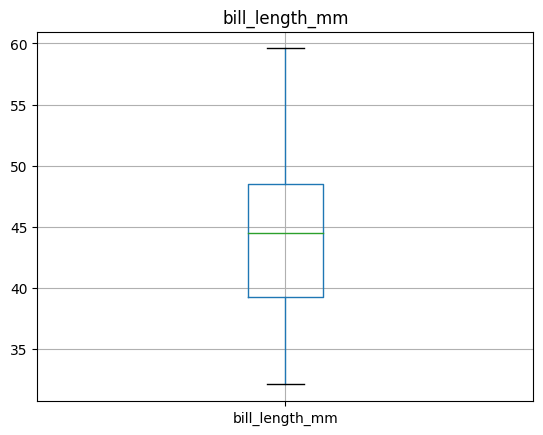

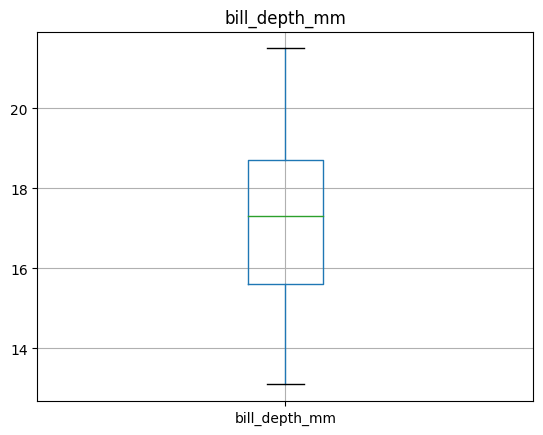

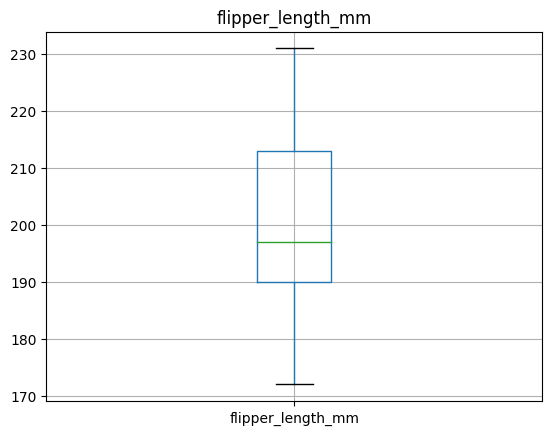

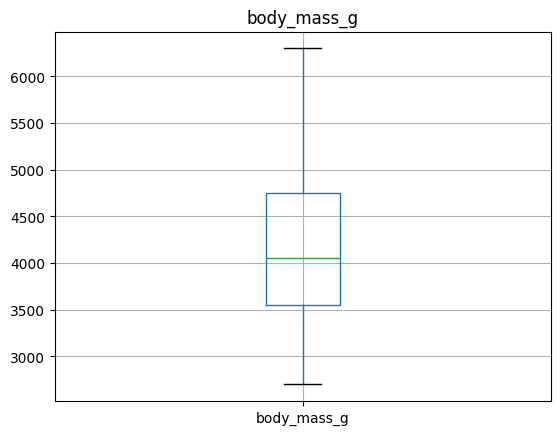

In [26]:
for column in data_numeric.columns:
    data.boxplot(column=[column])
    plt.title(column)
    plt.show()

# Кодирование категориальных признаков

In [27]:
# столбцы, которые будем кодировать
data_object = data.select_dtypes(include=['object'])
data_object.columns

Index(['species', 'island', 'sex'], dtype='object')

In [28]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
columns = ['island', 'sex']
data[columns]= enc.fit_transform(data[columns])

In [29]:
enc.categories_

[array(['Biscoe', 'Dream', 'Torgersen'], dtype=object),
 array(['female', 'male'], dtype=object)]

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['species']= le.fit_transform(data['species'])

In [31]:
le.classes_

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    int64  
 1   island             342 non-null    float64
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 18.8 KB


# Нормализация данных

In [33]:
y = data['species']
X = data.drop(['species'], axis=1)

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler_mm = MinMaxScaler()
X_mm = scaler_mm.fit_transform(X)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler_ss = StandardScaler()
X_ss = scaler_ss.fit_transform(X)

In [37]:
from sklearn.model_selection import train_test_split

X_mm_train, X_mm_test, y_mm_train, y_mm_test = train_test_split(X_mm, y, test_size = 0.2, random_state = 47)

In [38]:
X_ss_train, X_ss_test, y_ss_train, y_ss_test = train_test_split(X_ss, y, test_size = 0.2, random_state = 47)

# KNN

In [40]:
from sklearn.model_selection import GridSearchCV

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [43]:
parametrs_knn = { 'n_neighbors': range (1, 15, 1),
                  'metric': ['l1', 'l2', 'minkowski'] }
grid_knn = GridSearchCV(knn_clf, parametrs_knn)
grid_knn.fit(X_mm_train, y_mm_train)
grid_knn.best_params_

{'metric': 'l1', 'n_neighbors': 1}

In [44]:
knn_clf = KNeighborsClassifier(metric='l1', n_neighbors=1)
knn_clf.fit(X_mm_train, y_mm_train)
y_pred_knn = knn_clf.predict(X_mm_test)

In [45]:
from sklearn import metrics

In [62]:
knn_clf.score(X_mm_test, y_mm_test)

0.9855072463768116

In [46]:
print(metrics.classification_report(y_mm_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        20

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.98        69
weighted avg       0.99      0.99      0.99        69



In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# матрица ошибок
confusion_matrix(y_mm_test, y_pred_knn, labels=knn_clf.classes_)

array([[35,  0,  0],
       [ 1, 13,  0],
       [ 0,  0, 20]])

<Axes: >

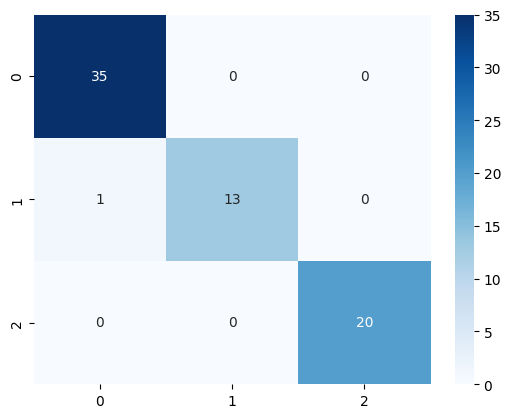

In [50]:
sns.heatmap(confusion_matrix(y_mm_test, y_pred_knn, labels=knn_clf.classes_),
                cmap=plt.cm.Blues,
                annot=True)

In [51]:
result = {'knn': knn_clf.score(X_mm_test, y_mm_test)}

# Random forest

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

In [54]:
parametrs_rf = { 'n_estimators': range (50, 150, 2),
                  'criterion': ['gini', 'entropy', 'log-loss'] }
grid_rf = GridSearchCV(rf_clf, parametrs_rf)
grid_rf.fit(X_train, y_train)
grid_rf.best_params_

{'criterion': 'gini', 'n_estimators': 118}

In [55]:
rf_clf = RandomForestClassifier(criterion='gini', n_estimators=118)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [61]:
rf_clf.score(X_test, y_test)

0.9710144927536232

In [56]:
print(metrics.classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.93      0.93      0.93        14
           2       1.00      1.00      1.00        20

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69



<Axes: >

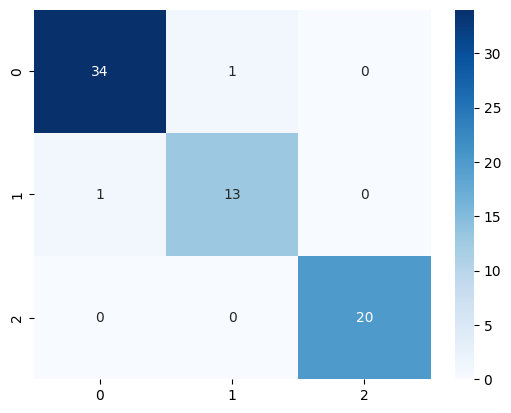

In [57]:
# матрица ошибок
confusion_matrix(y_mm_test, y_pred_knn, labels=knn_clf.classes_)
sns.heatmap(confusion_matrix(y_test, y_pred_rf, labels=rf_clf.classes_),
                cmap=plt.cm.Blues,
                annot=True)

In [60]:
result['RandomForest'] = rf_clf.score(X_test, y_test)

# SVM

In [63]:
from sklearn.svm import SVC

svc_clf = SVC()

In [64]:
parametrs_svc = { 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] }
grid_svc = GridSearchCV(svc_clf, parametrs_svc)
grid_svc.fit(X_ss_train, y_ss_train)
grid_svc.best_params_

{'kernel': 'poly'}

In [66]:
svc_clf = SVC(kernel='poly')
svc_clf.fit(X_ss_train, y_ss_train)
y_pred_svc = svc_clf.predict(X_ss_test)

In [67]:
svc_clf.score(X_ss_test, y_ss_test)

0.9855072463768116

In [68]:
print(metrics.classification_report(y_ss_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        20

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.98        69
weighted avg       0.99      0.99      0.99        69



<Axes: >

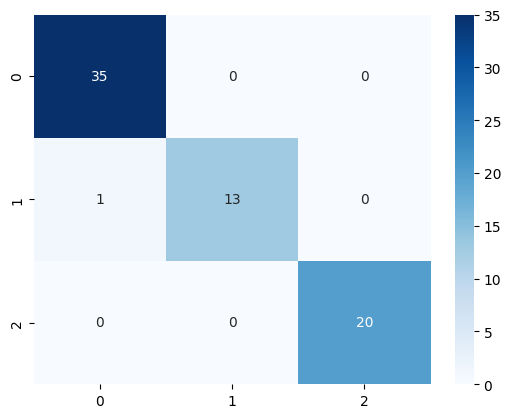

In [69]:
# матрица ошибок
confusion_matrix(y_ss_test, y_pred_svc, labels=svc_clf.classes_)
sns.heatmap(confusion_matrix(y_ss_test, y_pred_svc, labels=svc_clf.classes_),
                cmap=plt.cm.Blues,
                annot=True)

In [70]:
result['SVC'] = svc_clf.score(X_ss_test, y_ss_test)

In [71]:
result

{'knn': 0.9855072463768116,
 'RandomForest': 0.9710144927536232,
 'SVC': 0.9855072463768116}